In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
#  Here, we need to perform Data Processing and EDA. Therefore, we will work on "Train.csv" dataset.

df = pd.read_csv(r"C:\Users\sutha\Downloads\titanic\train.csv");
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.describe(include='all')


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [7]:
print("Columns available in dataset:", df.columns)

Columns available in dataset: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [12]:
# Now, for Data Cleaning and Handling.

print(df.isnull().sum())   #  in this, we can see Cabin has 687 null values which is not good.


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64


In [13]:
# Here, we will drop the cabin Column

df.drop(columns='Cabin', inplace=True)


KeyError: "['Cabin'] not found in axis"

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [15]:
#  Now, we Cabin column but we need "Age" and "Embarked" column but they have some NaN values.

df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])


In [17]:
print(df.isnull().sum())


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


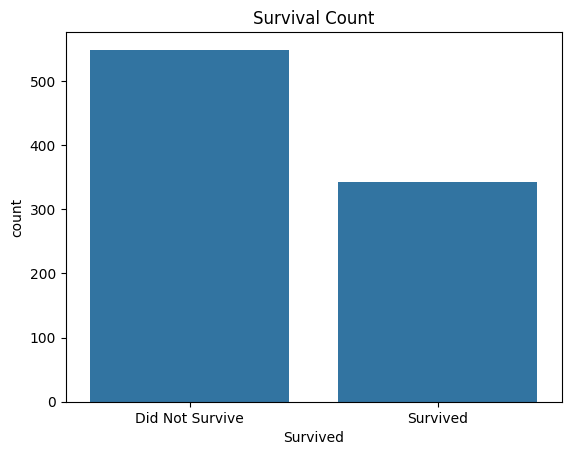

In [21]:
#  Now, Perform EDA with some visualization and insights.
# 1.  Countplot of Survived column

sns.countplot(data=df, x='Survived')
plt.title('Survival Count')
plt.xticks([0,1], ['Did Not Survive', 'Survived'])
plt.show()


#  Insight:  0 = Did not survive, 1 = Survived.  0 has more count than 1. So, most of the people did not survive.

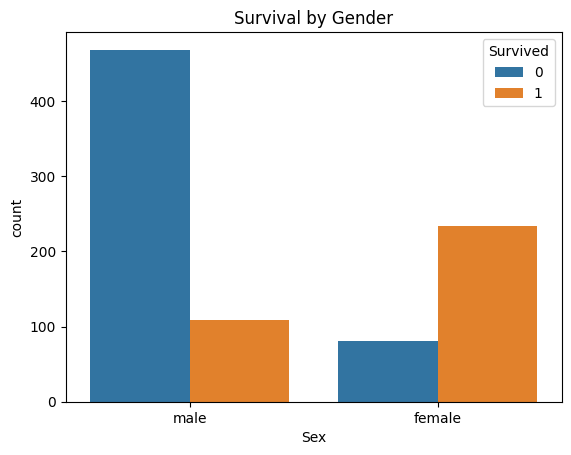

In [22]:
#  Survival by Gender
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title('Survival by Gender')
plt.show()

#  Insight: Women had a higher chance of survival.

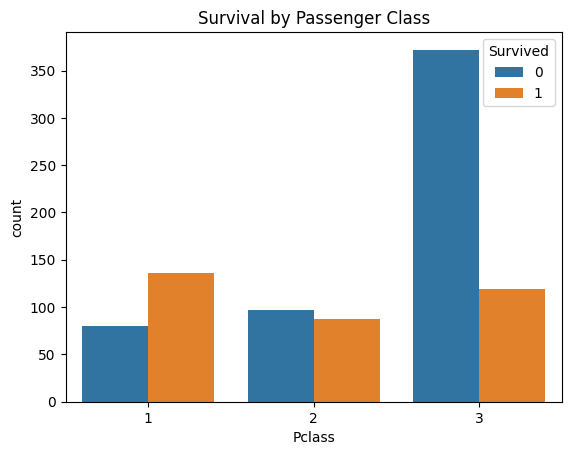

In [23]:
#  Survival by Passenger Class

sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title('Survival by Passenger Class')
plt.show()

#  Insight:  Class 1 had the highest survival rate, while Class 3 had the lowest.


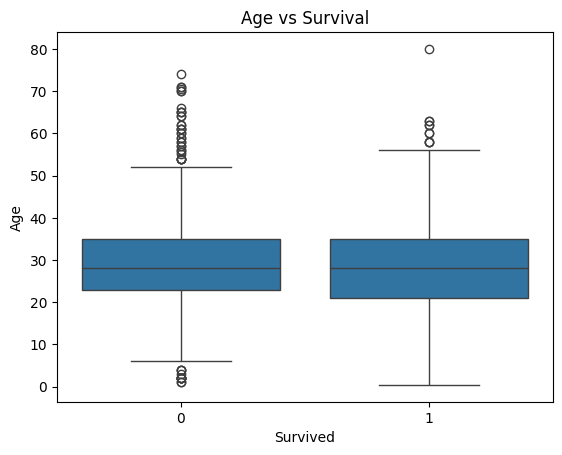

In [25]:
#  Age Distribution

sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Age vs Survival')
plt.show()

#  Insight:  Younger passengers had a higher chance of survival. 


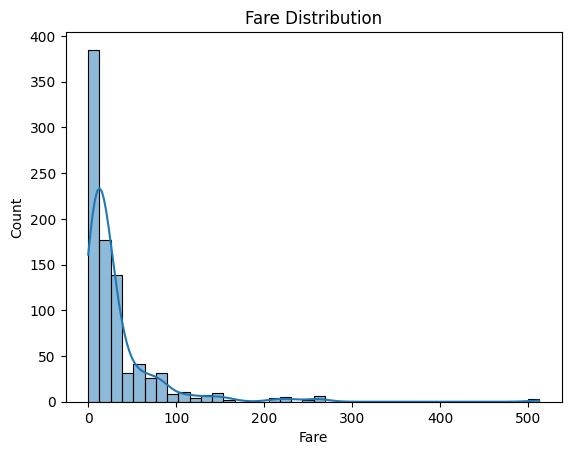

In [38]:
# Based on Fare Distribution

sns.histplot(df['Fare'], kde=True, bins=40)
plt.title('Fare Distribution')
plt.show()

# Insight: Most passengers paid low fares.

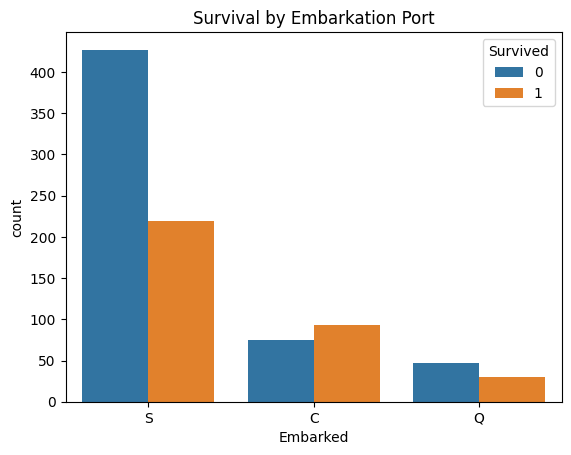

In [40]:

#  Embarkation analysis , which mostly passengers are heading and their survival rate.

sns.countplot(data=df, x='Embarked', hue='Survived')
plt.title('Survival by Embarkation Port')
plt.show()

# Insight: passengers from Cherbourg (C)  had higher survival rates which often linked with more first-class passengers boarding there.

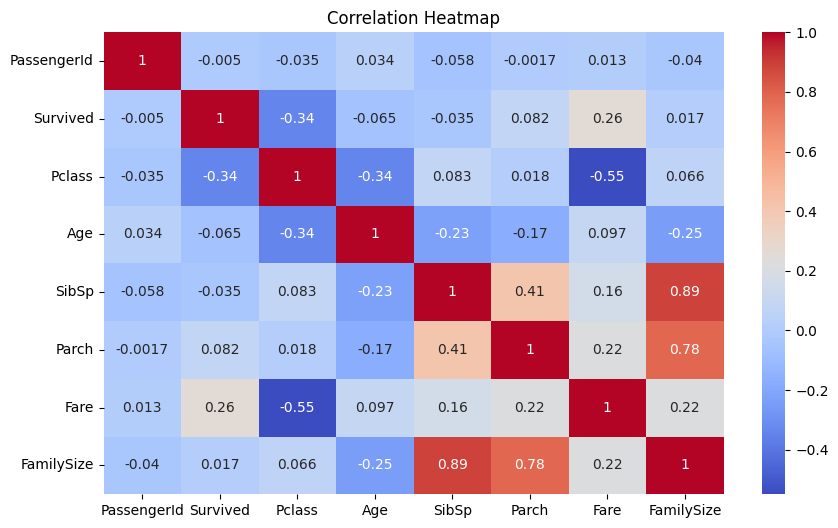

In [42]:
#  Overrall Correlation of the whole data.

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [29]:
print("Survival rate by sex:")
print(df.groupby('Sex')['Survived'].mean())

print("\nSurvival rate by class:")
print(df.groupby('Pclass')['Survived'].mean())

print("\nSurvival rate by Embarkation:")
print(df.groupby('Embarked')['Survived'].mean())


Survival rate by sex:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

Survival rate by class:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

Survival rate by Embarkation:
Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64


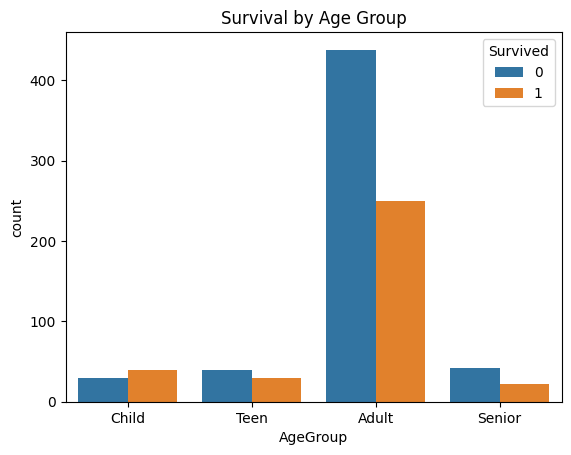

In [44]:
#   Survival by Age Group like divide in Child, Teen, Adult, Senior.

df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 18, 50, 100], labels=['Child', 'Teen', 'Adult', 'Senior'])
sns.countplot(x='AgeGroup', hue='Survived', data=df)
plt.title('Survival by Age Group')
plt.show()

# Insight: Mostly Adult didn't survive they lost their life in more number.

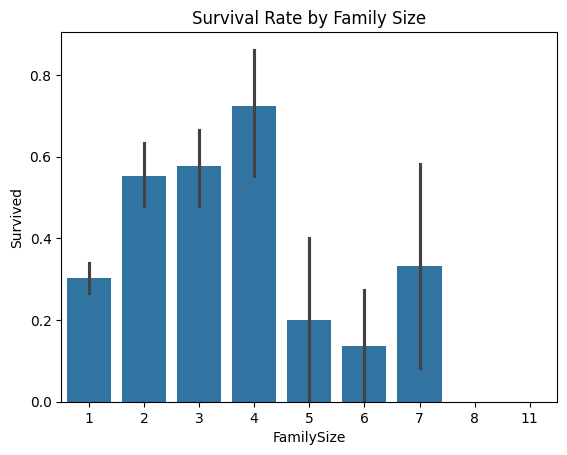

In [46]:
#  Survival Rate by Family

df['FamilySize'] = df['SibSp'] + df['Parch'] + 1  
sns.barplot(x='FamilySize', y='Survived', data=df)
plt.title('Survival Rate by Family Size')
plt.show()

# Insight: Very small (1) or very large families (7+) had lower survival.
#          Small to medium families (2–4) had better odds.